# SASE: Self-Amplified Spontaneous Emission

In [1]:
import sys
ROOT_DIR = ".."
if ROOT_DIR not in sys.path:
    sys.path.append(ROOT_DIR)

In [2]:
import os
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pysingfel as ps

Psana functionality is not available.


In [3]:
def wavelength_to_photon_energy(wavelength):
    """
    Convert wave length to photon energy in eV
    :param wavelength: wavelength in m.
    :return:
    """
    return 1.2398e-06 / wavelength

### LS49 specifications
https://pswww.slac.stanford.edu/questionnaire_slac/proposal_questionnaire/run16/LS49/#xray

## Test Case 1. Compare pysingfel SASE spectrum with LS49 SASE spectrum (photon energy = 7120eV)

In [4]:
wavlen_7120eV = np.array([1.75354289, 1.75329492, 1.75304701, 1.75279918, 1.75255142,
       1.75230372, 1.7520561 , 1.75180855, 1.75156107, 1.75131365,
       1.75106631, 1.75081904, 1.75057183, 1.7503247 , 1.75007763,
       1.74983064, 1.74958372, 1.74933686, 1.74909008, 1.74884336,
       1.74859671, 1.74835014, 1.74810363, 1.74785719, 1.74761083,
       1.74736453, 1.7471183 , 1.74687214, 1.74662605, 1.74638003,
       1.74613408, 1.74588819, 1.74564238, 1.74539664, 1.74515096,
       1.74490536, 1.74465982, 1.74441435, 1.74416895, 1.74392362,
       1.74367836, 1.74343317, 1.74318805, 1.742943  , 1.74269801,
       1.7424531 , 1.74220825, 1.74196347, 1.74171876, 1.74147412,
       1.74122955, 1.74098505, 1.74074061, 1.74049624, 1.74025195,
       1.74000772, 1.73976356, 1.73951947, 1.73927544, 1.73903149,
       1.7387876 , 1.73854378, 1.73830004, 1.73805635, 1.73781274,
       1.7375692 , 1.73732572, 1.73708231, 1.73683897, 1.7365957 ,
       1.7363525 , 1.73610936, 1.73586629, 1.73562329, 1.73538036,
       1.7351375 , 1.7348947 , 1.73465198, 1.73440932, 1.73416672,
       1.7339242 , 1.73368175, 1.73343936, 1.73319704, 1.73295478,
       1.7327126 , 1.73247048, 1.73222843, 1.73198645, 1.73174454,
       1.73150269, 1.73126091, 1.7310192 , 1.73077755, 1.73053598,
       1.73029447, 1.73005302, 1.72981165, 1.72957034, 1.7293291 ])


flux_7120eV_ebeam0 = np.array([1.23671883e+08, 9.61746443e+07, 1.24049034e+08, 1.42267618e+08,
       1.89821645e+08, 2.05998928e+08, 2.21572519e+08, 2.54688519e+08,
       2.84442325e+08, 2.96166287e+08, 3.64081476e+08, 4.17700295e+08,
       4.71363120e+08, 6.59135221e+08, 5.73812964e+08, 6.34300498e+08,
       7.71302387e+08, 8.86449012e+08, 9.81827870e+08, 8.39448332e+08,
       9.24321990e+08, 1.19273773e+09, 1.30524268e+09, 1.69064908e+09,
       2.12312386e+09, 1.80994361e+09, 1.79148373e+09, 1.66648726e+09,
       2.30305012e+09, 3.88071700e+09, 4.71397448e+09, 5.63242428e+09,
       5.93986877e+09, 5.94284736e+09, 6.19665682e+09, 8.19924840e+09,
       9.76019212e+09, 1.40454734e+10, 1.72493787e+10, 1.78756611e+10,
       2.06738251e+10, 3.70573675e+10, 5.48781626e+10, 5.39452192e+10,
       7.22689630e+10, 6.23604334e+10, 1.29966480e+11, 5.57813995e+10,
       4.26045603e+10, 4.26934346e+10, 4.47353436e+10, 4.25684554e+10,
       2.81984456e+10, 3.36572783e+10, 2.23099091e+10, 2.28223716e+10,
       3.40715634e+10, 3.37104670e+10, 2.60777388e+10, 1.81401929e+10,
       2.25881611e+10, 1.32293518e+10, 7.33472574e+09, 6.04655306e+09,
       7.01928695e+09, 6.57396092e+09, 5.76262230e+09, 4.77476422e+09,
       2.79639896e+09, 2.99550529e+09, 3.42484922e+09, 2.73264203e+09,
       2.61095436e+09, 1.84199222e+09, 1.83487864e+09, 1.86871949e+09,
       1.87949279e+09, 1.11523534e+09, 1.62063334e+09, 3.12318471e+09,
       4.08154144e+09, 1.92038270e+09, 1.50815084e+09, 1.59028591e+09,
       3.05379232e+09, 2.89750070e+09, 1.19314298e+09, 7.62200211e+08,
       7.61331248e+08, 7.33508824e+08, 8.14328606e+08, 7.79339607e+08,
       7.79098808e+08, 7.06789802e+08, 3.97094179e+08, 2.85029543e+08,
       2.47650860e+08, 1.75471189e+08, 1.15599259e+08, 1.09351249e+08])

flux_7120eV_ebeam1 = np.array([1.40345120e+08, 1.06215688e+08, 1.38050550e+08, 1.87469764e+08,
       2.56306785e+08, 2.58050100e+08, 3.05531303e+08, 3.62544250e+08,
       3.97736755e+08, 4.28373005e+08, 5.48991629e+08, 5.00576101e+08,
       5.15028093e+08, 7.35041558e+08, 7.37945868e+08, 9.30081048e+08,
       8.31471244e+08, 9.01760372e+08, 9.62507509e+08, 1.50461937e+09,
       1.86922696e+09, 1.70799736e+09, 1.41516825e+09, 1.99123415e+09,
       2.88544775e+09, 2.31885984e+09, 2.75855722e+09, 3.75650945e+09,
       3.97639885e+09, 3.69212525e+09, 6.80078246e+09, 6.64227334e+09,
       6.41862845e+09, 8.48537873e+09, 1.01411941e+10, 9.86815597e+09,
       1.87203212e+10, 2.20609831e+10, 2.57811956e+10, 3.36918408e+10,
       4.40790348e+10, 8.16874728e+10, 9.10989565e+10, 1.30938009e+11,
       8.60485532e+10, 7.83958923e+10, 7.37643170e+10, 7.25550933e+10,
       6.45864025e+10, 3.42628465e+10, 3.88946850e+10, 3.35476125e+10,
       2.80513756e+10, 2.34793688e+10, 2.02531564e+10, 3.15751740e+10,
       1.79535525e+10, 1.45745923e+10, 1.75380134e+10, 1.31971282e+10,
       8.06093005e+09, 6.23833864e+09, 8.37083748e+09, 8.15721849e+09,
       8.48822427e+09, 4.03088779e+09, 3.06966452e+09, 2.18366398e+09,
       1.78481450e+09, 2.09111051e+09, 2.06836883e+09, 1.85257098e+09,
       1.95268971e+09, 1.91882431e+09, 2.24362028e+09, 2.28906187e+09,
       1.70025361e+09, 1.09308593e+09, 1.29402966e+09, 9.41250486e+08,
       9.07106640e+08, 1.20813743e+09, 1.18764803e+09, 1.15118465e+09,
       1.20128725e+09, 1.30696036e+09, 6.89681374e+08, 7.17240158e+08,
       8.38638301e+08, 6.79147942e+08, 5.38343888e+08, 4.17824536e+08,
       5.94006359e+08, 6.26034324e+08, 4.41202466e+08, 3.49348705e+08,
       2.74986092e+08, 1.98769847e+08, 1.29017673e+08, 1.01569608e+08])

flux_7120eV_ebeam2 = np.array([1.11551190e+08, 8.60626120e+07, 1.16654414e+08, 1.38471995e+08,
       1.93325509e+08, 2.07644878e+08, 2.00834484e+08, 2.30099536e+08,
       2.69623309e+08, 3.23774873e+08, 3.38328042e+08, 3.40711435e+08,
       3.80571449e+08, 5.62078617e+08, 4.65815997e+08, 5.02007762e+08,
       6.11309710e+08, 5.46885440e+08, 5.87655661e+08, 7.28926961e+08,
       8.26818142e+08, 9.23129375e+08, 1.16096657e+09, 9.39461421e+08,
       1.42017087e+09, 1.86238008e+09, 2.51372797e+09, 2.67979514e+09,
       2.42129172e+09, 2.92948972e+09, 3.27488321e+09, 5.27575266e+09,
       5.72848197e+09, 6.47613381e+09, 9.79238642e+09, 7.35737655e+09,
       9.40153414e+09, 1.48635505e+10, 1.33794987e+10, 1.79662285e+10,
       3.22761284e+10, 4.69818334e+10, 4.65346869e+10, 3.87063537e+10,
       8.85008984e+10, 7.58403224e+10, 8.07924630e+10, 7.75730108e+10,
       1.19890949e+11, 6.18158996e+10, 3.84568443e+10, 3.42069313e+10,
       1.98258504e+10, 2.87290947e+10, 1.95967299e+10, 2.55761756e+10,
       3.65179922e+10, 2.06304723e+10, 1.52803656e+10, 9.74341792e+09,
       6.81953587e+09, 6.75715106e+09, 7.02922694e+09, 3.67061367e+09,
       3.67033966e+09, 4.73074261e+09, 8.69512726e+09, 5.98912105e+09,
       3.65385048e+09, 3.06892123e+09, 4.47626351e+09, 4.67100108e+09,
       3.12850715e+09, 2.05828224e+09, 3.22328501e+09, 1.76882524e+09,
       1.52431825e+09, 1.28592396e+09, 1.24578623e+09, 1.08279686e+09,
       1.38991922e+09, 1.91573633e+09, 1.08312249e+09, 2.03877231e+09,
       2.27023851e+09, 8.49827193e+08, 5.98502220e+08, 5.82039560e+08,
       4.51848289e+08, 5.30003022e+08, 4.66799735e+08, 3.71049454e+08,
       4.62967377e+08, 3.75321310e+08, 2.11289095e+08, 1.81361824e+08,
       1.64964979e+08, 1.43575007e+08, 1.08318553e+08, 8.46742350e+07])

### Resampling and Kernel Density Estimation (KDE)
#### Generate and plot a "KDE" starting from a histogram

7070.257631394462
7169.254250101962


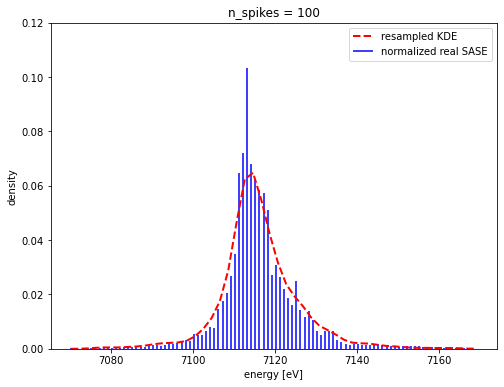

In [5]:
n = 100

h = flux_7120eV_ebeam1/np.array(flux_7120eV_ebeam1).sum() #*beam.get_photons_per_pulse()
e = wavelength_to_photon_energy(wavlen_7120eV)*10**10

x = np.linspace(e.min(), e.max())
print (e.min())
print (e.max())

# plot the histogram
plt.figure(figsize=(8,6))
plt.vlines(e, 0, h, color="b", label="normalized real SASE")

# resample the histogram and find the KDE
resamples = np.random.choice(e, size=n*10, p=h/h.sum())
rkde = stats.gaussian_kde(resamples)

# plot the KDE
plt.plot(x, rkde.pdf(x), '--', c='r', lw=2, label='resampled KDE')
plt.title('n = %d' % n)
plt.xlabel('energy [eV]')
plt.ylabel('density')
plt.title('n_spikes = %d' % n)
plt.legend()
plt.ylim(0, 0.12)
plt.show()

#### Mean, standard deviation and bandwidth estimation using Monte Carlo method

In [6]:
bandwidth = rkde.factor
mean_mc = resamples.mean()
variance_mc = resamples.var()

print('bandwidth =',bandwidth)
print('mean =',mean_mc)
print('variance =',variance_mc)
print('standard deviation =',np.sqrt(variance_mc))

bandwidth = 0.251188643150958
mean = 7116.29005256834
variance = 87.43286534953174
standard deviation = 9.350554280337168


In [7]:
Beam = ps.Beam

In [8]:
class MyBeam(Beam):
    def __init__(self, mu=None, sigma=None, n_spikes=0,
                 *args, **kargs):
        super(MyBeam, self).__init__(**kargs)
        self.mu = mu
        self.sigma = sigma
        self.n_spikes = n_spikes

#    def get_highest_wavenumber_beam(self):
#        """
#        For variable/polychromatic beam to return highest wavenumber.
#        """
#        return Beam(
#            wavenumber=self.wavenumber * (1+0.5*self.bandwidth),
#            focus_x=self._focus_xFWHM,
#            focus_y=self._focus_yFWHM,
#            focus_shape=self._focus_shape,
#            fluence=self.get_photons_per_pulse()
#        )
    
    def generate_new_state(self):
        """
        For variable beam to return specific instance.
        """
        # If simple Beam, return itself.
        # Variable beams should return simple one.
        samples = np.random.normal(mu, sigma, n_spikes)
        
        gkde = stats.gaussian_kde(samples)

        gkde.set_bandwidth(bw_method=0.25)

        ind = np.linspace(self.mu-50, self.mu+50, self.n_spikes+1)

        density, bins, patches = plt.hist(samples, bins=ind, histtype=u'step', density=True)
        plt.plot(ind, gkde(ind),"r")
        
        photon_energy = np.linspace(self.mu-50, self.mu+50, self.n_spikes+1).tolist()
        fluences = (self.get_photons_per_pulse()*density/density.sum())
        
        return [
            Beam(
                photon_energy=photon_energy[i],
                focus_x=self._focus_xFWHM,
                focus_y=self._focus_yFWHM,
                focus_shape=self._focus_shape,
                fluence=fluences[i])
            for i in range(self.n_spikes)
        ]

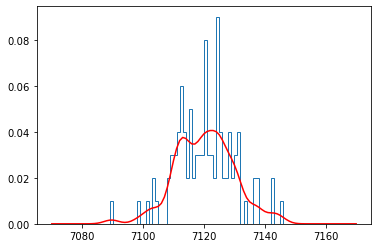

In [9]:
mu, sigma = 7120, 9 # mean and standard deviation
n_spikes = 100
beam = MyBeam(mu, sigma, n_spikes, fname=ROOT_DIR+'/input/beam/amo86615.beam')

sase = beam.generate_new_state()

In [10]:
energy = []
flux = []
for i in range(100):
    energy.append(sase[i].photon_energy)
    flux.append(sase[i].get_photons_per_pulse())

In [11]:
samples = np.random.normal(mu, sigma, n_spikes)
gkde = stats.gaussian_kde(samples)
gkde.set_bandwidth(bw_method=0.251188643150958)
ind = np.linspace(mu-50, mu+50, n_spikes+1)
kdepdf = gkde(ind)

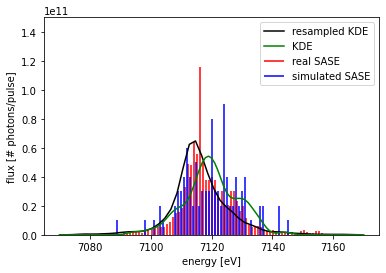

In [12]:
plt.vlines(wavelength_to_photon_energy(wavlen_7120eV)*10**10, 0, flux_7120eV_ebeam0/np.array(flux_7120eV_ebeam0).sum()*beam.get_photons_per_pulse(), color="r", label="real SASE")
plt.vlines(energy, 0, flux, color="b", label="simulated SASE")
plt.plot(x, rkde.pdf(x)*beam.get_photons_per_pulse(), color="k", label='resampled KDE')
plt.plot(ind, kdepdf*beam.get_photons_per_pulse(), color='g', label="KDE")
plt.xlabel('energy [eV]')
plt.ylabel('flux [# photons/pulse]')
plt.legend()
plt.ylim(0, 1.5e11)
plt.show()

### Compute the Kolmogorov-Smirnov statistic on 2 samples
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html

(1) For a different distribution, we can reject the null hypothesis since the pvalue is below 1%;
(2) For a slightly different distribution, we cannot reject the null hypothesis at a 10% or lower alpha since the p-value at 0.144 is higher than 10%;
(3) For an identical distribution, we cannot reject the null hypothesis since the p-value is high, 41%.

In [13]:
from scipy.stats import ks_2samp
ks_2samp(rkde.pdf(x),kdepdf)

Ks_2sampResult(statistic=0.3562376237623762, pvalue=0.00023298222006162828)

## Test Case 2. Compare pysingfel SASE spectrum with LS49 SASE spectrum (photon energy = 3560eV)

In [14]:
wavlen_3560eV = np.array([3.53181171, 3.53080592, 3.52980071, 3.52879607, 3.527792  ,
       3.52678851, 3.52578558, 3.52478323, 3.52378144, 3.52278022,
       3.52177958, 3.5207795 , 3.51977999, 3.51878104, 3.51778266,
       3.51678485, 3.51578761, 3.51479093, 3.51379481, 3.51279926,
       3.51180428, 3.51080985, 3.50981599, 3.5088227 , 3.50782996,
       3.50683779, 3.50584618, 3.50485512, 3.50386463, 3.5028747 ,
       3.50188533, 3.50089651, 3.49990826, 3.49892056, 3.49793342,
       3.49694683, 3.49596081, 3.49497533, 3.49399042, 3.49300606,
       3.49202225, 3.491039  , 3.4900563 , 3.48907415, 3.48809256,
       3.48711152, 3.48613103, 3.48515109, 3.4841717 , 3.48319286,
       3.48221458, 3.48123684, 3.48025965, 3.47928301, 3.47830692,
       3.47733137, 3.47635637, 3.47538192, 3.47440801, 3.47343465,
       3.47246184, 3.47148957, 3.47051784, 3.46954666, 3.46857602,
       3.46760593, 3.46663638, 3.46566737, 3.4646989 , 3.46373097,
       3.46276358, 3.46179673, 3.46083043, 3.45986466, 3.45889943,
       3.45793474, 3.45697058, 3.45600697, 3.45504389, 3.45408135,
       3.45311934, 3.45215787, 3.45119694, 3.45023654, 3.44927667,
       3.44831734, 3.44735854, 3.44640028, 3.44544255, 3.44448535,
       3.44352868, 3.44257254, 3.44161693, 3.44066186, 3.43970731,
       3.43875329, 3.43779981, 3.43684685, 3.43589442, 3.43494251])

flux_3560eV_ebeam0 = np.array([1.23671883e+08, 9.61746443e+07, 1.24049034e+08, 1.42267618e+08,
       1.89821645e+08, 2.05998928e+08, 2.21572519e+08, 2.54688519e+08,
       2.84442325e+08, 2.96166287e+08, 3.64081476e+08, 4.17700295e+08,
       4.71363120e+08, 6.59135221e+08, 5.73812964e+08, 6.34300498e+08,
       7.71302387e+08, 8.86449012e+08, 9.81827870e+08, 8.39448332e+08,
       9.24321990e+08, 1.19273773e+09, 1.30524268e+09, 1.69064908e+09,
       2.12312386e+09, 1.80994361e+09, 1.79148373e+09, 1.66648726e+09,
       2.30305012e+09, 3.88071700e+09, 4.71397448e+09, 5.63242428e+09,
       5.93986877e+09, 5.94284736e+09, 6.19665682e+09, 8.19924840e+09,
       9.76019212e+09, 1.40454734e+10, 1.72493787e+10, 1.78756611e+10,
       2.06738251e+10, 3.70573675e+10, 5.48781626e+10, 5.39452192e+10,
       7.22689630e+10, 6.23604334e+10, 1.29966480e+11, 5.57813995e+10,
       4.26045603e+10, 4.26934346e+10, 4.47353436e+10, 4.25684554e+10,
       2.81984456e+10, 3.36572783e+10, 2.23099091e+10, 2.28223716e+10,
       3.40715634e+10, 3.37104670e+10, 2.60777388e+10, 1.81401929e+10,
       2.25881611e+10, 1.32293518e+10, 7.33472574e+09, 6.04655306e+09,
       7.01928695e+09, 6.57396092e+09, 5.76262230e+09, 4.77476422e+09,
       2.79639896e+09, 2.99550529e+09, 3.42484922e+09, 2.73264203e+09,
       2.61095436e+09, 1.84199222e+09, 1.83487864e+09, 1.86871949e+09,
       1.87949279e+09, 1.11523534e+09, 1.62063334e+09, 3.12318471e+09,
       4.08154144e+09, 1.92038270e+09, 1.50815084e+09, 1.59028591e+09,
       3.05379232e+09, 2.89750070e+09, 1.19314298e+09, 7.62200211e+08,
       7.61331248e+08, 7.33508824e+08, 8.14328606e+08, 7.79339607e+08,
       7.79098808e+08, 7.06789802e+08, 3.97094179e+08, 2.85029543e+08,
       2.47650860e+08, 1.75471189e+08, 1.15599259e+08, 1.09351249e+08])

flux_3560eV_ebeam1 = np.array([1.40345120e+08, 1.06215688e+08, 1.38050550e+08, 1.87469764e+08,
       2.56306785e+08, 2.58050100e+08, 3.05531303e+08, 3.62544250e+08,
       3.97736755e+08, 4.28373005e+08, 5.48991629e+08, 5.00576101e+08,
       5.15028093e+08, 7.35041558e+08, 7.37945868e+08, 9.30081048e+08,
       8.31471244e+08, 9.01760372e+08, 9.62507509e+08, 1.50461937e+09,
       1.86922696e+09, 1.70799736e+09, 1.41516825e+09, 1.99123415e+09,
       2.88544775e+09, 2.31885984e+09, 2.75855722e+09, 3.75650945e+09,
       3.97639885e+09, 3.69212525e+09, 6.80078246e+09, 6.64227334e+09,
       6.41862845e+09, 8.48537873e+09, 1.01411941e+10, 9.86815597e+09,
       1.87203212e+10, 2.20609831e+10, 2.57811956e+10, 3.36918408e+10,
       4.40790348e+10, 8.16874728e+10, 9.10989565e+10, 1.30938009e+11,
       8.60485532e+10, 7.83958923e+10, 7.37643170e+10, 7.25550933e+10,
       6.45864025e+10, 3.42628465e+10, 3.88946850e+10, 3.35476125e+10,
       2.80513756e+10, 2.34793688e+10, 2.02531564e+10, 3.15751740e+10,
       1.79535525e+10, 1.45745923e+10, 1.75380134e+10, 1.31971282e+10,
       8.06093005e+09, 6.23833864e+09, 8.37083748e+09, 8.15721849e+09,
       8.48822427e+09, 4.03088779e+09, 3.06966452e+09, 2.18366398e+09,
       1.78481450e+09, 2.09111051e+09, 2.06836883e+09, 1.85257098e+09,
       1.95268971e+09, 1.91882431e+09, 2.24362028e+09, 2.28906187e+09,
       1.70025361e+09, 1.09308593e+09, 1.29402966e+09, 9.41250486e+08,
       9.07106640e+08, 1.20813743e+09, 1.18764803e+09, 1.15118465e+09,
       1.20128725e+09, 1.30696036e+09, 6.89681374e+08, 7.17240158e+08,
       8.38638301e+08, 6.79147942e+08, 5.38343888e+08, 4.17824536e+08,
       5.94006359e+08, 6.26034324e+08, 4.41202466e+08, 3.49348705e+08,
       2.74986092e+08, 1.98769847e+08, 1.29017673e+08, 1.01569608e+08])

flux_3560eV_ebeam2 = np.array([1.11551190e+08, 8.60626120e+07, 1.16654414e+08, 1.38471995e+08,
       1.93325509e+08, 2.07644878e+08, 2.00834484e+08, 2.30099536e+08,
       2.69623309e+08, 3.23774873e+08, 3.38328042e+08, 3.40711435e+08,
       3.80571449e+08, 5.62078617e+08, 4.65815997e+08, 5.02007762e+08,
       6.11309710e+08, 5.46885440e+08, 5.87655661e+08, 7.28926961e+08,
       8.26818142e+08, 9.23129375e+08, 1.16096657e+09, 9.39461421e+08,
       1.42017087e+09, 1.86238008e+09, 2.51372797e+09, 2.67979514e+09,
       2.42129172e+09, 2.92948972e+09, 3.27488321e+09, 5.27575266e+09,
       5.72848197e+09, 6.47613381e+09, 9.79238642e+09, 7.35737655e+09,
       9.40153414e+09, 1.48635505e+10, 1.33794987e+10, 1.79662285e+10,
       3.22761284e+10, 4.69818334e+10, 4.65346869e+10, 3.87063537e+10,
       8.85008984e+10, 7.58403224e+10, 8.07924630e+10, 7.75730108e+10,
       1.19890949e+11, 6.18158996e+10, 3.84568443e+10, 3.42069313e+10,
       1.98258504e+10, 2.87290947e+10, 1.95967299e+10, 2.55761756e+10,
       3.65179922e+10, 2.06304723e+10, 1.52803656e+10, 9.74341792e+09,
       6.81953587e+09, 6.75715106e+09, 7.02922694e+09, 3.67061367e+09,
       3.67033966e+09, 4.73074261e+09, 8.69512726e+09, 5.98912105e+09,
       3.65385048e+09, 3.06892123e+09, 4.47626351e+09, 4.67100108e+09,
       3.12850715e+09, 2.05828224e+09, 3.22328501e+09, 1.76882524e+09,
       1.52431825e+09, 1.28592396e+09, 1.24578623e+09, 1.08279686e+09,
       1.38991922e+09, 1.91573633e+09, 1.08312249e+09, 2.03877231e+09,
       2.27023851e+09, 8.49827193e+08, 5.98502220e+08, 5.82039560e+08,
       4.51848289e+08, 5.30003022e+08, 4.66799735e+08, 3.71049454e+08,
       4.62967377e+08, 3.75321310e+08, 2.11289095e+08, 1.81361824e+08,
       1.64964979e+08, 1.43575007e+08, 1.08318553e+08, 8.46742350e+07])

### Resampling and Kernel Density Estimation (KDE)
#### Generate and plot a "KDE" starting from a histogram

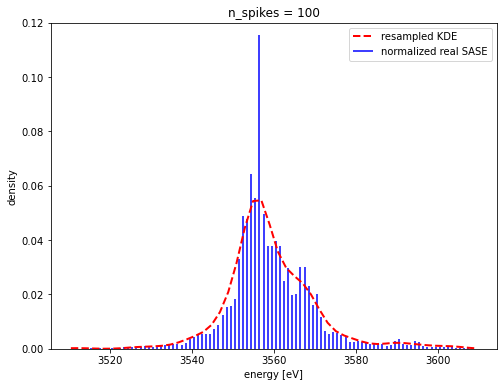

In [15]:
n = 100

h = flux_3560eV_ebeam0/np.array(flux_3560eV_ebeam0).sum() #*beam.get_photons_per_pulse()
e = wavelength_to_photon_energy(wavlen_3560eV)*10**10

x = np.linspace(e.min(), e.max())

# plot the histogram
plt.figure(figsize=(8,6))
plt.vlines(e, 0, h, color="b", label="normalized real SASE")

# resample the histogram and find the KDE
# p: the probabilities associated with each entry in e. 
# If not given the sample assumes a uniform distribution over all entries in e.
resamples = np.random.choice(e, size=n*10, p=h/h.sum()) 
rkde = stats.gaussian_kde(resamples)

# plot the KDE
plt.plot(x, rkde.pdf(x), '--', c='r', lw=2, label='resampled KDE')
plt.xlabel('energy [eV]')
plt.ylabel('density')
plt.title('n_spikes = %d' % n)
plt.legend()
plt.ylim(0, 0.12)
plt.show()

#### Mean, standard deviation and bandwidth estimation using Monte Carlo method

In [16]:
bandwidth = rkde.factor
mean_mc = resamples.mean()
variance_mc = resamples.var()

print('bandwidth =',bandwidth)
print('mean =',mean_mc)
print('variance =',variance_mc)
print('standard deviation =',np.sqrt(variance_mc))

bandwidth = 0.251188643150958
mean = 3559.2179905201365
variance = 117.43835494271518
standard deviation = 10.83689784683399


In [17]:
Beam = ps.Beam

In [18]:
class MyBeam(Beam):
    def __init__(self, mu=None, sigma=None, n_spikes=0,
                 *args, **kargs):
        super(MyBeam, self).__init__(**kargs)
        self.mu = mu
        self.sigma = sigma
        self.n_spikes = n_spikes

#    def get_highest_wavenumber_beam(self):
#        """
#        For variable/polychromatic beam to return highest wavenumber.
#        """
#        return Beam(
#            wavenumber=self.wavenumber * (1+0.5*self.bandwidth),
#            focus_x=self._focus_xFWHM,
#            focus_y=self._focus_yFWHM,
#            focus_shape=self._focus_shape,
#            fluence=self.get_photons_per_pulse()
#        )
    
    def generate_new_state(self):
        """
        For variable beam to return specific instance.
        """
        # If simple Beam, return itself.
        # Variable beams should return simple one.
        samples = np.random.normal(mu, sigma, n_spikes)
        
        gkde = stats.gaussian_kde(samples)

        gkde.set_bandwidth(bw_method=0.25)

        ind = np.linspace(self.mu-50, self.mu+50, self.n_spikes+1)

        density, bins, patches = plt.hist(samples, bins=ind, histtype=u'stepfilled', color='b', density=True)
        plt.plot(ind, gkde(ind),"r")
        
        photon_energy = np.linspace(self.mu-50, self.mu+50, self.n_spikes+1).tolist()
        fluences = (self.get_photons_per_pulse()*density/density.sum())
        
        return [
            Beam(
                photon_energy=photon_energy[i],
                focus_x=self._focus_xFWHM,
                focus_y=self._focus_yFWHM,
                focus_shape=self._focus_shape,
                fluence=fluences[i])
            for i in range(self.n_spikes)
        ]

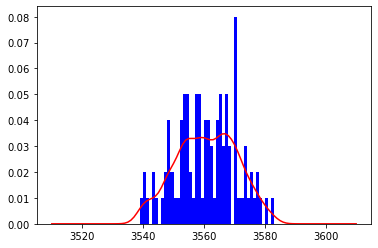

In [19]:
mu, sigma = 3560, 10 # mean and standard deviation
n_spikes = 100
beam = MyBeam(mu, sigma, n_spikes, fname=ROOT_DIR+'/input/beam/amo86615.beam')

sase = beam.generate_new_state()

In [20]:
energy = []
flux = []
for i in range(100):
    energy.append(sase[i].photon_energy)
    flux.append(sase[i].get_photons_per_pulse())

In [21]:
samples = np.random.normal(mu, sigma, n_spikes)
gkde = stats.gaussian_kde(samples)
ind = np.linspace(mu-50, mu+50, n_spikes+1)
kdepdf = gkde(ind)

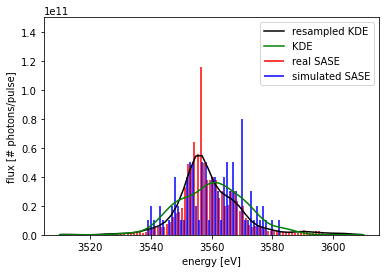

In [22]:
plt.vlines(wavelength_to_photon_energy(wavlen_3560eV)*10**10, 0, flux_3560eV_ebeam0/np.array(flux_3560eV_ebeam0).sum()*beam.get_photons_per_pulse(), color="r", label="real SASE")
plt.vlines(energy, 0, flux, color="b", label="simulated SASE")
plt.plot(x, rkde.pdf(x)*beam.get_photons_per_pulse(), color="k", label='resampled KDE')
plt.plot(ind, kdepdf*beam.get_photons_per_pulse(), color='g', label="KDE")
plt.xlabel('energy [eV]')
plt.ylabel('flux [# photons/pulse]')
plt.legend()
plt.ylim(0, 1.5e11)
plt.show()

In [23]:
from scipy.stats import ks_2samp
ks_2samp(rkde.pdf(x)*beam.get_photons_per_pulse(),kdepdf*beam.get_photons_per_pulse())

Ks_2sampResult(statistic=0.26732673267326734, pvalue=0.012153551840027421)